# Unsupervised Learning with Linear Algebra 

In this blog post, we use linear algebra methods for unsupervised learning with two kinds of data: images and graphs. In part I, we implement and experiment with compressing an image using singular value decomposition (SVD). In part II, we implement and experiment with community detection in a graph using spectral clustering. 

## Part I: Image Compression with the Singular Value Decomposition

In this part of the blog post, we will implement and experiment with compressing a image using singular value decomposition (SVD). To make this simplier for us, the image we will be compressing will be in greyscale. 

### Selecting Image and Converting to Greyscale

In order to compress an image using singular value decomposition (SVD), we first need to select one! 

![Phineas and Ferb](https://i.kym-cdn.com/photos/images/facebook/000/944/663/6a7.png)

Below are functions that will allow us to save this image for our usage and convert it to greyscale. 

In [42]:
from matplotlib import pyplot as plt
import numpy as np
import PIL
import urllib

def read_image(url):
    return np.array(PIL.Image.open(urllib.request.urlopen(url)))

def to_greyscale(im):
    return 1 - np.dot(im[...,:3], [0.2989, 0.5870, 0.1140])

As seen through the image comparison below, our `read_image` and `to_greyscale` functions work as anticipated. 

[Text(0.5, 1.0, 'greyscale')]

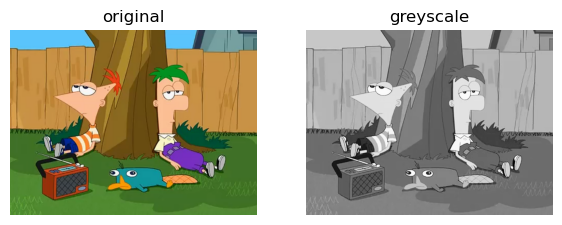

In [43]:
import pathlib

#url = pathlib.Path("../phineas_and_ferb.png").as_uri()
url = "https://i.kym-cdn.com/photos/images/facebook/000/944/663/6a7.png"

img = read_image(url)

fig, axarr = plt.subplots(1, 2, figsize = (7, 3))

grey_img = to_greyscale(img)

axarr[0].imshow(img)
axarr[0].axis("off")
axarr[0].set(title = "original")

axarr[1].imshow(grey_img, cmap = "Greys")
axarr[1].axis("off")
axarr[1].set(title = "greyscale")

### Reconstruct Image Using SVD

In [44]:
"""
Perform an experiment that reconstructs greyscale image (img) with 
several different values of k.
"""  
def svd_experiment(img):
    rows = 3
    columns = 3
    fig, axarr = plt.subplots(rows, columns) 
    
    # n * k + k + k * m

    for i in range(rows):
        for j in range(columns):
            k = (i * 3 + j + 1) * 10
            img_title = str(k) + " components"
            axarr[i][j].imshow(svd_reconstruct(img, k), cmap="Greys")
            axarr[i][j].axis("off")
            axarr[i][j].set(title=img_title)


def compare_images(A, A_):

    fig, axarr = plt.subplots(1, 2, figsize = (7, 3))

    axarr[0].imshow(A, cmap = "Greys")
    axarr[0].axis("off")
    axarr[0].set(title = "original image")

    axarr[1].imshow(A_, cmap = "Greys")
    axarr[1].axis("off")
    axarr[1].set(title = "reconstructed image")

In [52]:
from matplotlib import pyplot as plt
import numpy as np
import warnings 

"""
Given a greyscale image (img) and the number of singular values (k) to use, 
reconstruct the image from its singular value decomposition. 
"""
def svd_reconstruct(img, k, epsilon = 0):
# MAKE THE MEMORY THING AN OPTIONAL ARGUMENT HERE

    # Get height and width from image 
    # No third value in shape since img is in greyscale
    height, width = img.shape
    
    # Get the img as a 2D matrix 
    data = np.array(img) 
    
    # Return unmodified data if k is too large
    if ((k > height) or (k > width)):
        warnings.warn("WARNING: k > height or k > width of given image")
        return data
    
    # Compute a singular value decomposition (SVD)
    U, sigma, V = np.linalg.svd(data)

    # create the D matrix in the SVD
    D = np.zeros_like(data, dtype=float) # matrix of zeros of same shape as data
    D[:min(data.shape),:min(data.shape)] = np.diag(sigma)        # singular values on the main diagonal
    print(f"{D=}")
    print(f"Shape of {D.shape=}")
    print(f"{D[0,0]=}")

    # User did not specify desired threshold
    if (epsilon == 0): 
        # Approximate by using specified k components
        U_ = U[:,:k] # first k columns of U
        D_ = D[:k, :k] # top k singular values in D
        V_ = V[:k, :] # first k rows of V

    # User specified a threshold 
    else: 
        print("USER SPECIFIED EPSILON")
        D_rows, D_columns = D.shape

        # Check how many components have a singular value larger than epsilon 
        new_k = np.count_nonzero(D > epsilon) # Number of components with singular value larger than epilson 

        print(f"{new_k=}")
        if ((new_k > height) or (new_k > width)):
            new_k = min(height, width)
            print(f"adjusted new_k {new_k=}")
        
        U_ = U[:,:new_k] # first k columns of U
        D_ = D[:new_k, :new_k] # top k singular values in D
        V_ = V[:new_k, :] # first k rows of V 
        
        # If new_k is smaller than specified components, use new_k specified components 
        # if (new_k < k):
        #     print("USING new_k {new_k}")
        #     U_ = U[:,:new_k] # first k columns of U
        #     D_ = D[:new_k, :new_k] # top k singular values in D
        #     V_ = V[:new_k, :new_k] # first k rows of V
        # # Otherwise, found enough components with singular value larger than threshold 
        # # and use the users specified k components 
        # else:
        #     print(f"USING ORIGINAL k {k}")
        #     U_ = U[:,:k] # first k columns of U
        #     D_ = D[:k, :k] # top k singular values in D
        #     V_ = V[:k, :] # first k rows of V 

    # Reconstruct and compute approximation of data
    data_ = U_ @ D_ @ V_
    return data_

D=array([[107361.80291894,      0.        ,      0.        , ...,
             0.        ,      0.        ,      0.        ],
       [     0.        ,  13437.58425079,      0.        , ...,
             0.        ,      0.        ,      0.        ],
       [     0.        ,      0.        ,  10010.47331741, ...,
             0.        ,      0.        ,      0.        ],
       ...,
       [     0.        ,      0.        ,      0.        , ...,
             0.        ,      0.        ,      0.        ],
       [     0.        ,      0.        ,      0.        , ...,
             0.        ,      0.        ,      0.        ],
       [     0.        ,      0.        ,      0.        , ...,
             0.        ,      0.        ,      0.        ]])
Shape of D.shape=(768, 1024)
D[0,0]=107361.8029189376
D=array([[107361.80291894,      0.        ,      0.        , ...,
             0.        ,      0.        ,      0.        ],
       [     0.        ,  13437.58425079,      0.        , ..

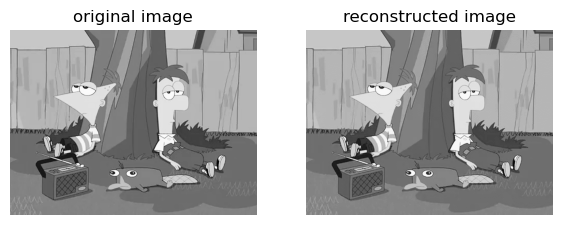

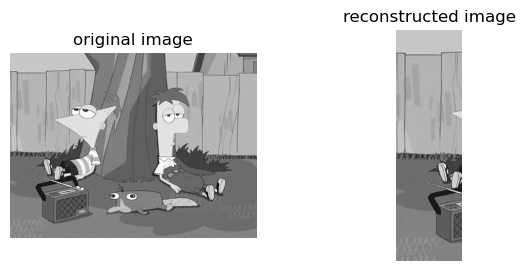

In [53]:
#svd_experiment(to_greyscale(img))
compare_images(to_greyscale(img), svd_reconstruct(to_greyscale(img), 219, epsilon=0))
compare_images(to_greyscale(img), svd_reconstruct(to_greyscale(img), 90, epsilon=100))

## Part II: Spectral Community Detection

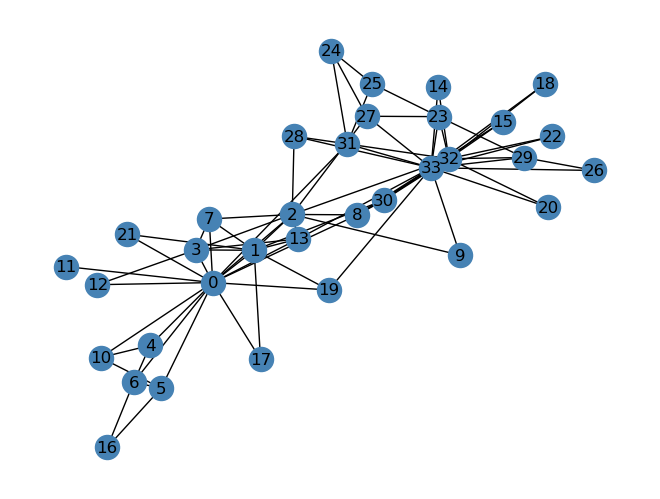

In [ ]:
# Karate Clubs Graph
import networkx as nx
G = nx.karate_club_graph()
layout = nx.layout.fruchterman_reingold_layout(G)
nx.draw(G, layout, with_labels=True, node_color = "steelblue")

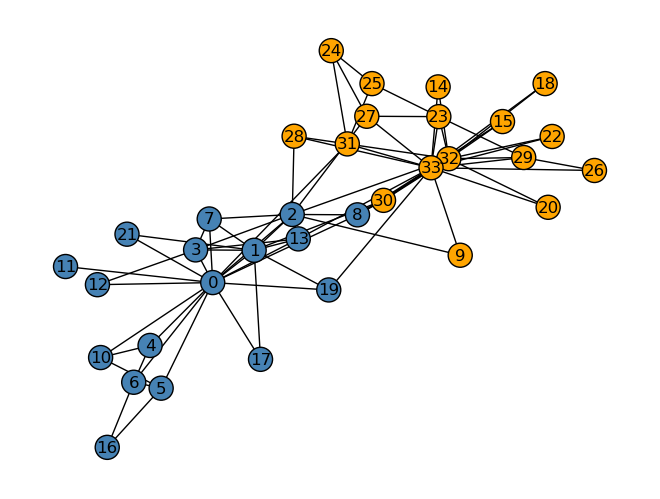

In [ ]:
clubs = nx.get_node_attributes(G, "club")

nx.draw(G, layout,
        with_labels=True, 
        node_color = ["orange" if clubs[i] == "Officer" else "steelblue" for i in G.nodes()],
        edgecolors = "black" # confusingly, this is the color of node borders, not of edges
        ) 

In [ ]:
# Adjacency Matrix for unabled graph G
A = nx.adjacency_matrix(G).toarray()
A

array([[0, 4, 5, ..., 2, 0, 0],
       [4, 0, 6, ..., 0, 0, 0],
       [5, 6, 0, ..., 0, 2, 0],
       ...,
       [2, 0, 0, ..., 0, 4, 4],
       [0, 0, 2, ..., 4, 0, 5],
       [0, 0, 0, ..., 4, 5, 0]])

In [ ]:
# Symmetrize A
A = A + A.T
A[A > 1] = 1
A

array([[0, 1, 1, ..., 1, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 1, 0],
       ...,
       [1, 0, 0, ..., 0, 1, 1],
       [0, 0, 1, ..., 1, 0, 1],
       [0, 0, 0, ..., 1, 1, 0]])